<a href="https://colab.research.google.com/github/shahadatrucse/Machine-Learning/blob/main/hagrid_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

drive mount

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

!mkdir dataset
%cd /content/dataset

#Download Like Gesture Dataset
#!wget https://sc.link/xjDB

#Download dislike gesture dataset
#!wget https://sc.link/xjDB

#Download palm gesture dataset
# !wget https://sc.link/nJp7

#Download mute gesture dataset
# !wget https://sc.link/q8vp

#Download peace gesture dataset
# !wget https://sc.link/l6nM

#Download ok gesture dataset
# !wget https://sc.link/pV0V

#Download rock gesture dataset
# !wget https://sc.link/kMm6

#Download fist gesture dataset need to download
# !wget https://sc.link/wgB8

#Download test gesture dataset
# !wget https://sc.link/zlGy

In [ ]:
#count images in a folder
import os
import cv2

def count_image(path):
  cnt = 0
  for f in os.listdir(path):
    if '.jpg'in f:
      image = cv2.imread(path+'/'+f, 3)
      print(image.shape)
      cnt += 1
      # if cnt>=17050:
      #   break

  return cnt

In [ ]:
print("Total Images ",count_image('/content/drive/MyDrive/hagrid_dataset/dataset/ok'))

In [ ]:
#Move all images in the drive
import shutil
import cv2
import os
list_img = {
    
}



targetSize = 512
def resize_and_move(path, save_path):
  cnt = 0
  folder = ['peace','rock','test']
  for fol in folder:
  
    for f in os.listdir(path+fol):
      if '.jpg'in f:
        cnt += 1
        image_path = os.path.join(path+fol,f)
        image = cv2.imread(image_path,3)
        #os.remove(image_path)
        image = cv2.resize(image, (targetSize, targetSize));
        cv2.imwrite(image_path, image)
        
        print("{} Iteration = {}".format(fol,cnt))
      
    
  return cnt

In [ ]:
print(resize_and_move('/content/drive/MyDrive/hagrid_dataset/dataset/','/content/drive/MyDrive/hagrid_dataset/dataset/'))

In [ ]:
# import module
import os
 
# assign size
size = 0
 
# assign folder path
Folderpath = '/content/drive/MyDrive/hagrid_dataset/dataset/ok'
 
# get size
size = 0

for ele in os.scandir(Folderpath):
      size+=os.path.getsize(ele)
     
print(size/1000000000)

1.3483263


In [ ]:
%cd /content/sample_data
!mkdir annotation
%cd annotation
!wget https://sc.link/BE5Y

In [ ]:
!jar xvf /content/sample_data/annotation/BE5Y
!rm -rf //content/sample_data/annotation/BE5Y

In [ ]:
import os
dataset_path = '/content/drive/MyDrive/hagrid_dataset/dataset'

imgList = {
    
}
folder=['like','dislike','mute','palm']

cnt = 0
for dir in folder:
  if ('.ip' in dir) or ('test' in dir):
    continue
  for img in os.listdir(os.path.join(dataset_path,dir)):
    if '.jpg' in img:
      imgList[img]=os.path.join(dataset_path,dir)
      #print(dir,"    ", img,"    ", imgList[img])
      cnt +=1

      # if cnt>=10:
      #   break
print(cnt)

67456


In [ ]:
len(imgList)

67456

In [ ]:
'''
    Splits each gesture classes of hagrid dataset into train and validation set 
    Resizes images of into 1024x1024
    Converts annotation of hagrid dataset into csv format
    Saves them in respective class directories (80% train and 20% validation)
'''

import csv
import json
import math
import os
import random
from turtle import width
import progressbar
import cv2
import os



# Gesture list to be processed
TARGET = [
    "dislike",
    "like",
    "mute",
    "palm",
    "no_gesture"
]

# Header of csv file
#type(train,test,valid) img_path, class, xmin, ymin, , , xmax, ymax
# Find all directories in given path
def find_directory_list(directory_path):
    list_dir = []
    for dir in os.listdir(directory_path):
        if dir in TARGET:
            list_dir.append(dir)
    return list_dir


# Find all images in given directory, Not necessery now
def find_file(directory, filename):
    for root, dirs, files in os.walk(directory):
        if filename in files:
            return os.path.join(root, filename)
    return None


# Insert annotation to csv file
def save_csv(csv_path, csv_content):
    with open(csv_path, 'w', newline='') as csvfile:
        wr = csv.writer(csvfile)
        for i in range(len(csv_content)):
            wr.writerow(csv_content[i])
            
            
# Create directory with given name if it doesn't exist
def create_directory(dir_path):
    if not os.path.exists(dir_path):
        os.makedirs(dir_path)
    else:
        print("directory already exist")
        
        
# Calculate xmin, ymin, xmax, ymax of bounding box from annotation
def calculated_bbox(bboxes, img_width, img_height):
    xmin = int(float(bboxes[0])*img_width)
    ymin = int(float(bboxes[1])*img_height)
    xmax = xmin + int(float(bboxes[2])*img_width)
    ymax = ymin + int(float(bboxes[3]*img_height))
    return xmin, ymin, xmax, ymax


def process_dataset(gesture_images_path, gesture_annotation_json_path, width, height):
    
    csv_file = '/content/drive/MyDrive/hagrid_dataset/annotation_csv/annotation.csv'

    csvList = []

    '''Iterate every gesture class'''
    for gesture in TARGET:
        #since no_gesture has no extra class, ignore it
        if 'no_gesture' in gesture:
            continue
        print("\nProcessing gesture: " + gesture + "...\n")
        
        '''Make gesture annotation list from json annotation file'''
        json_gesture_annotation_list = []
        count = 0
        
        
        with open(os.path.join(gesture_annotation_json_path, gesture+".json"), "r") as f:
            data = json.load(f)
            for key, value in data.items():
                imgName = key+'.jpg'
                if imgName not in imgList:
                    continue
                count += 1
                json_gesture_annotation_list.append({'path': imgList[imgName], 'labels': value['labels'], 'boxes': value['bboxes'], 'name': key})
                
        print(count)

        '''shuffle gesture_annotation_list for random choose for validation and train'''
        random.shuffle(json_gesture_annotation_list)

        total = len(json_gesture_annotation_list)

        for i in range(total):
          arr_labels = []
          arr_bboxes = []
          
          '''get labels and bboxes for an image from json list'''
          for labels in json_gesture_annotation_list[i]['labels']:
              arr_labels.append(labels)
          for bboxes in json_gesture_annotation_list[i]['boxes']:
              arr_bboxes.append(bboxes)

          for j in range(len(arr_labels)):
              '''calculate bbox'''
              if arr_labels[j] in TARGET:
                  xmin, ymin, xmax, ymax = calculated_bbox(arr_bboxes[j][:4],width,height)
                  TYPE = 'TRAIN'
                  if int(total*0.80<i):
                    TYPE = 'VALIDATION'
              
                  csvList.append([TYPE, imgList[json_gesture_annotation_list[i]['name']+'.jpg']+'/'+json_gesture_annotation_list[i]['name']+'.jpg', arr_labels[j], xmin, ymin,'','', xmax, ymax])

    random.shuffle(csvList)

    # for i in range(len(csvList)):
    #   print(csvList[i]) 
    #   if(i>=100):
    #     break; 
    save_csv(csv_file,csvList)

                    
                    
if __name__=="__main__":
    
    #annotation json path
    # GESTURE_ANNOTATION_JSON_PATH = os.path.join(os.getcwd(),'dataset\\train\\ann_train_val')
    GESTURE_ANNOTATION_JSON_PATH = '/content/dataset/ann_train_val'

    #gesture dataset path which you want to process
    # GESTURE_DATASET_PATH = os.path.join(os.getcwd(), 'dataset/train/images_train_val')
    GESTURE_DATASET_PATH = '/content/drive/MyDrive/hagrid_dataset/dataset'
    height = 512
    width = 512
  
    
    # Process the dataset and save it into csv files
    process_dataset(GESTURE_DATASET_PATH, GESTURE_ANNOTATION_JSON_PATH, width, height)
    
    
    


Processing gesture: dislike...

17050

Processing gesture: like...

17051

Processing gesture: mute...

17050

Processing gesture: palm...

16305


(512, 512, 3)


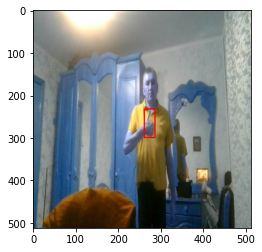

In [ ]:
import cv2
import os
import csv
import shutil
img_path = ''
csv_path = ''
targetSize = 1024
import matplotlib.pyplot as plt

def calculated_bbox(bboxes, img_width, img_height):
    xmin = int(float(bboxes[0])*img_width)
    ymin = int(float(bboxes[1])*img_height)
    xmax = int(float(bboxes[2])*img_width)
    ymax = int(float(bboxes[3]*img_height))
    
    return xmin, ymin, xmax, ymax

def drawBox(image, boxes):
    
    cv2.rectangle(image, (boxes[0], boxes[1]), (boxes[2],boxes[3]), (255, 0, 0), 2)
    plt.imshow(image)
    plt.show()


bboxes = [261,232,286,299]

img_path = '/content/drive/MyDrive/hagrid_dataset/dataset/like/21237f22-9fe5-4694-9990-671801052207.jpg'

img = cv2.imread(img_path,3)
print(img.shape)
# bbox = calculated_bbox(bboxes, targetSize, targetSize)

drawBox(img, bboxes)


In [ ]:
print("hello")

hello


In [ ]:
!sudo apt -y install libportaudio2
!pip install -q --use-deprecated=legacy-resolver tflite-model-maker
!pip install -q pycocotools
!pip install -q opencv-python-headless==4.1.2.30
!pip uninstall -y tensorflow && pip install -q tensorflow==2.8.0

In [ ]:
#change flatebuffer version
!pip install --upgrade flatbuffers

In [ ]:
import numpy as np
import os

from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.config import ExportFormat
from tflite_model_maker import model_spec
from tflite_model_maker import object_detector

import tensorflow as tf
assert tf.__version__.startswith('2')

tf.get_logger().setLevel('ERROR')
from absl import logging
logging.set_verbosity(logging.ERROR)

In [ ]:
spec = model_spec.get('efficientdet_lite4')

In [ ]:
train_data, validation_data, test_data = object_detector.DataLoader.from_csv('/content/drive/MyDrive/hagrid_dataset/annotation_csv/annotation.csv')

KeyboardInterrupt: ignored

In [ ]:
model = object_detector.create(train_data, model_spec=spec, epochs=80, batch_size=16, train_whole_model=True, validation_data=validation_data)

In [ ]:
model.export(export_dir='/content/drive/MyDrive/hagrid_dataset/model/')

In [ ]:
#67.5 GB available silo, Look, koto thake